# Indoor Climbing Hold Segmentation

This Jupyter notebook is an interactive overview of the major components of https://github.com/xiaoxiae/Hei-CV-Final-2022-23.

Before running the repository, make sure you have downloaded the appropriate datasets from www.kaggle.com/tomasslama/indoor-climbing-gym-hold-segmentation and placed them in their respective folders in `data/`.
Also make sure that you have installed the required Python packages, which can be found in `requirements.txt` (i.e. `python3 -m pip install -r requirements.txt`).

## Hold Segmentation

### Standard Approach

The standard approach can be broadly separated into the following parts:
1. detect blobs, which are centers of holds
2. detect edges, which are outlines of holds
3. for each blob, find a threshold such that the contour fits the outline

Each of the functions that process the images are configured with sane defaults, refer to `std/utils.py` if you wish to change them.

#### Blob detection

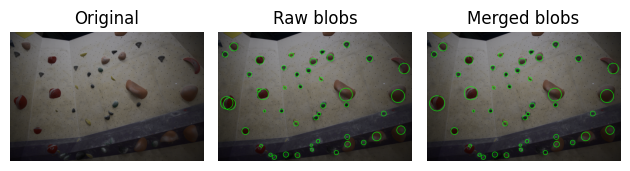

In [8]:
from std.utils import *
from matplotlib import pyplot as plt


img = cv.imread('data/sm/298.jpg')

# blob detection
keypoints = detect_blobs(img)
img_blobs = img.copy()
draw_keypoints(img_blobs, keypoints)

# merge blobs that have an overlapping
keypoints = merge_blobs(keypoints)
img_blobs_merged = img.copy()
draw_keypoints(img_blobs_merged, keypoints)                                                     


# display the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img[:, :, ::-1])
ax1.axis('off')
ax1.set_title('Original')

ax2.imshow(img_blobs[:, :, ::-1])
ax2.axis('off')
ax2.set_title('Raw blobs')

ax3.imshow(img_blobs_merged[:, :, ::-1])
ax3.axis('off')
ax3.set_title('Merged blobs')

fig.tight_layout()
plt.show()

#### Edge detection

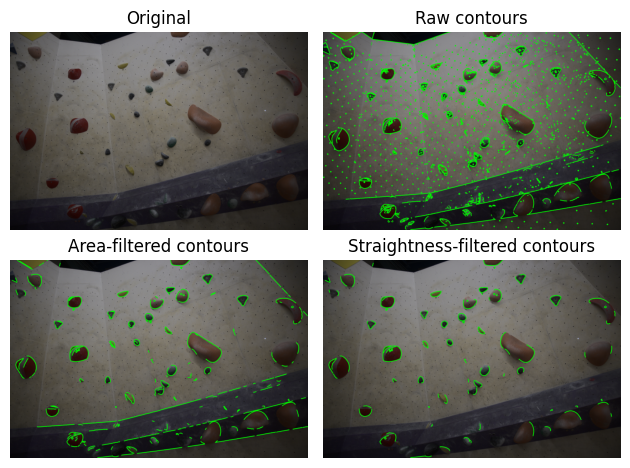

In [9]:
# blur the image for smoother edges
blur = gaussian_blur(img)

# find the contours
edges = canny(blur)
contours = find_contours(edges)

img_contours = img.copy()
draw_contours(img_contours, contours)

contours = filter_size_contours(contours)
img_contours_area = img.copy()
draw_contours(img_contours_area, contours)

contours = filter_straight_contours(contours)
img_contours_straight = img.copy()
draw_contours(img_contours_straight, contours)


# display the results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.imshow(img[:, :, ::-1])
ax1.axis('off')
ax1.set_title('Original')

ax2.imshow(img_contours[:, :, ::-1])
ax2.axis('off')
ax2.set_title('Raw contours')

ax3.imshow(img_contours_area[:, :, ::-1])
ax3.axis('off')
ax3.set_title('Area-filtered contours')

ax4.imshow(img_contours_straight[:, :, ::-1])
ax4.axis('off')
ax4.set_title('Straightness-filtered contours')

fig.tight_layout()
plt.show()

#### Combining the approaches

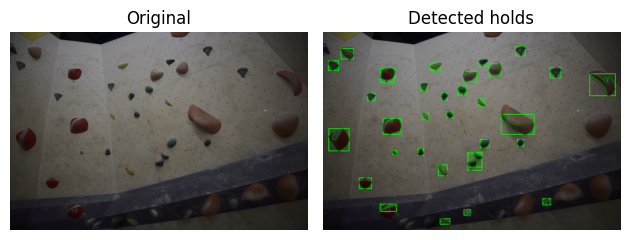

In [10]:
# contours are simplified to speed up the detection
contours = simplify_contours(contours)

# approximate holds by their contours
# returns a dictionary of keypoint-contour
# NOTE that this step can take a few minutes, depending on a number of keypoints
hold_approximations = detect_holds(img, keypoints, contours)

img_holds = img.copy()
draw_contour_boxes(img_holds, list(hold_approximations.values()), color=(0, 255, 0))
draw_contours(img_holds, list(hold_approximations.values()), color=(0, 128, 0))


# display the results
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img[:, :, ::-1])
ax1.axis('off')
ax1.set_title('Original')

ax2.imshow(img_holds[:, :, ::-1])
ax2.axis('off')
ax2.set_title('Detected holds')

fig.tight_layout()
plt.show()

### Learning-based Approach

## Route Detection

### Standard Approach

### Learning-based Approach